In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.isnull().sum() # gives the missing values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<Axes: >

In [9]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [71]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [13]:
## to check datatypes
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [20]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [22]:
final_df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [23]:
country_names =final_df.Country.value_counts().index
print(country_names)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')


In [29]:
co_value=final_df.Country.value_counts().values
print(co_value)

[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


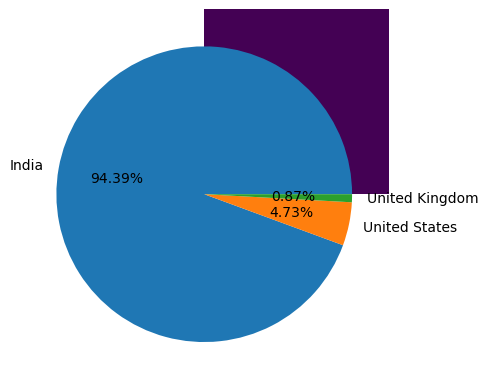

In [33]:
# top 3 countries that uses zomatoo

plt.pie(co_value[:3],labels=country_names[:3],autopct="%2.2f%%")
plt.show()


observation:Zomato maximum records for  india,
                                     after united kingdom and then united states

In [36]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [38]:
final_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [40]:
final_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [42]:
final_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [44]:
ratings=final_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [46]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [ ]:
##conculsion
1. when rating is between 4.5-4.9 excellent
2.when rating is between 4-4.5 very good
3. when rating is between 3.5-3.9 good
 when rating is between 3.0-3.4 average
 when rating is between 2.5-2.9  average
 when rating is between 2.0-2.4  average

In [50]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


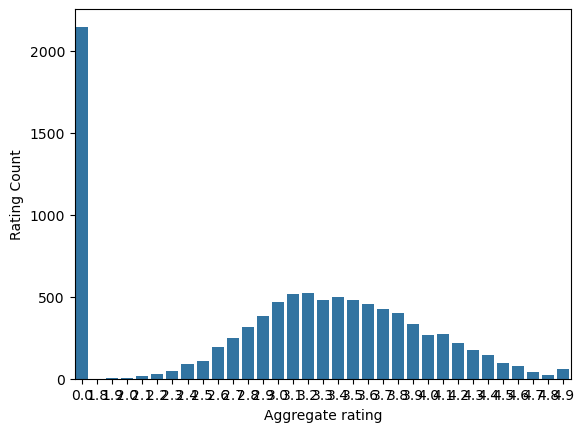

In [52]:
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)
plt.show()


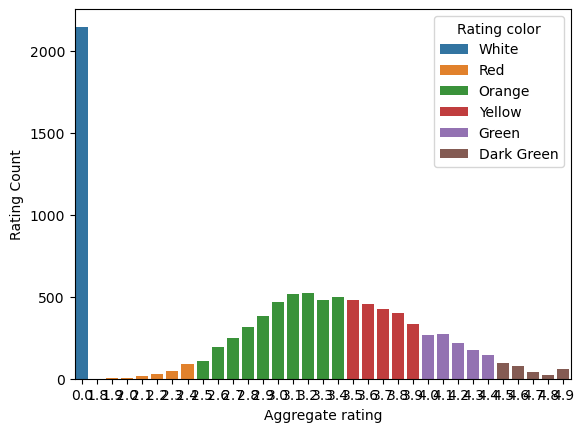

In [53]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue="Rating color",data=ratings)
plt.show()

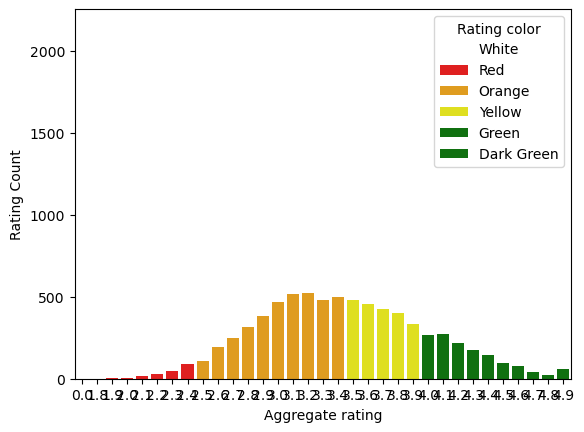

In [55]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue="Rating color",data=ratings,palette=['white','red','orange','yellow','green','green'])
plt.show()

In [111]:
#Find the countries name that has given 0 rating
final_df.tail(20)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9531,6000747,The Bigos,208,Ankara,"Mahallesi, Selanik 2 Caddesi, No 61/A, íankay...",KÛ±zÛ±lay,"KÛ±zÛ±lay, Ankara",32.857917,39.916686,Cafe,...,No,No,No,No,3,3.8,Yellow,Good,123,Turkey
9532,6002025,MasabaôÛ±,208,Ankara,"Kocatepe Mahallesi, Mithatpaôa Caddesi, No 62...",KÛ±zÛ±lay,"KÛ±zÛ±lay, Ankara",32.859867,39.919144,"Kebab, Turkish Pizza",...,No,No,No,No,3,4.2,Green,Very Good,103,Turkey
9533,6003879,Zigana Pide,208,Ankara,"Macun Mahallesi, Erciyes ÛÁôyerleri Sitesi, 2...",Macunkí_y,"Macunkí_y, Ankara",32.763378,39.946278,Turkish Pizza,...,No,No,No,No,2,4.3,Green,Very Good,103,Turkey
9534,6004089,Dí_veroÛôlu,208,Ankara,"Maltepe Mahallesi, Gení_lik Caddesi, No 28, í...",Maltepe,"Maltepe, Ankara",32.842742,39.922536,"Kebab, Desserts, Turkish Pizza",...,No,No,No,No,3,4.4,Green,Very Good,131,Turkey
9535,6000921,Dí_veroÛôlu,208,Ankara,"íìmitkí_y Mahallesi, 2432. Cadde (8. Cadde), N...",íìmitkí_y,"íìmitkí_y, Ankara",32.701775,39.891564,"Kebab, Desserts, Turkish Pizza",...,No,No,No,No,3,4.2,Green,Very Good,152,Turkey
9536,6004813,Pizza ÛÁl Forno,208,Ankara,"YÛ±ldÛ±zevler Mahallesi, 720. Sokak, No 2/B, í...",YÛ±ldÛ±zevler,"YÛ±ldÛ±zevler, Ankara",32.860217,39.876239,Pizza,...,No,No,No,No,2,4.7,Dark Green,Excellent,104,Turkey
9537,5904116,J'adore Chocolatier,208,ÛÁstanbul,"AsmalÛ±mescit Mahallesi, ÛÁstiklal Caddesi, Em...",AsmalÛ±mescit,"AsmalÛ±mescit, ÛÁstanbul",28.976127,41.033002,Desserts,...,No,No,No,No,2,4.7,Dark Green,Excellent,1311,Turkey
9538,5901782,Starbucks,208,ÛÁstanbul,"Bebek Mahallesi, Cevdetpaôa Caddesi, No 30/A,...",Bebek,"Bebek, ÛÁstanbul",29.043734,41.077696,Cafe,...,No,No,No,No,2,4.9,Dark Green,Excellent,1042,Turkey
9539,5902117,Valonia,208,ÛÁstanbul,"Tí_rkali Mahallesi, Ihlamurdere Caddesi, No 40...",Beôiktaô Merkez,"Beôiktaô Merkez, ÛÁstanbul",29.002896,41.044813,"Restaurant Cafe, Desserts",...,No,No,No,No,3,4.2,Green,Very Good,874,Turkey
9540,5927248,Draft Gastro Pub,208,ÛÁstanbul,"Caddebostan Mahallesi, BaÛôdat Caddesi, No 349...",Caddebostan,"Caddebostan, ÛÁstanbul",29.074116,40.963935,Bar Food,...,No,No,No,No,4,4.9,Dark Green,Excellent,522,Turkey


In [107]:
#Find the countries name that has given 0 rating
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()


,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [117]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [119]:
#which currency is used by which country
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [125]:
final_df.groupby(['Country','Currency']).size().reset_index().head()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21


In [131]:
#which country do have online delivers option 
final_df.groupby(['Country','Is delivering now']).size().reset_index()



,Country,Is delivering now,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,8618
4,India,Yes,34
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [137]:
final_df[final_df['Has Online delivery']=="Yes"].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [145]:
# create a pie chart for cites distribution
final_df.City.value_counts().index


Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

In [157]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

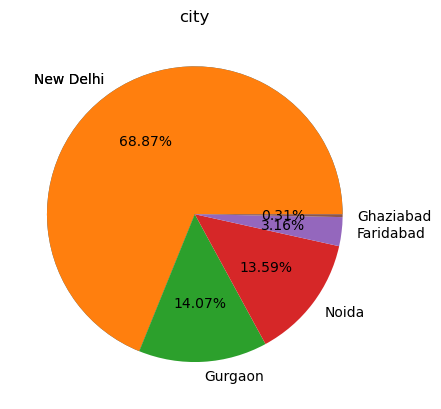

In [169]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct="%1.2f%%")
plt.title("city")

plt.show()